# Lab 01: Deep Neural Networks in PyTorch

Author Henrik Horst, opencampus.sh
Co-Author Albert Sandritter, opencampus.sh
24.10.2023

## Overview

The goal of this first lab is to get you acquainted with the PyTorch library. As you will see, I commented quite heavily to enable this notebook to be a standalone tutorial where you always can come back to fill your knowledge gaps. For those who are quite annoyed by this.. it'll become better in future notebooks😊

### PyTorch

At its core, PyTorch is a library for
- doing math on arrays(tensors)
- automatic calculation of gradients (called Autograd)
- acceleration with GPUs and distribution over multiple devices.

Most of the time,
we work at a remove from the core features of PyTorch,
using abstractions from `torch.nn`
or from frameworks on top of PyTorch.

In [51]:
import torch # this is the main PyTorch library
import torchvision # this library belongs also to PyTorch - it is not included in the main lib (import torch) \
                   # because when you do no vision like for e.g. in language models you do not need it. \
                   # (Just in case you wondered why it is a separate package)
import pandas as pd

In [52]:
## reproducibility
random_seed = 1
torch.manual_seed(random_seed)
torch.backends.cudnn.enabled = False # there are some non-determernistic process in the cuda environment.\
                                     # Don't bother about it now (or probably any time)

## Data is all we need 🤗

In ML, we always start with **data** and in PyTorch they invented a really easy and nifty way to handle it well. In PyTorch there is a **Dataset class** which does all the job. In the beginning of your PyTorch journey it is a bit hard to grasp but once you get it you can use it really with ease. So as a start we just load one of the standard datasets in the ML field. The famous **MNIST Dataset**. This one is already provided out of the box from the torchvision package. So let's start!

In [53]:
'''
!!! You can completely ignore this cell if you are a beginner !!!
If you're a bit familiar with PyTorch you may wonder why we do not use transforms as in the code below in the loading of the dataset.
This has just educational purposes and you will see why later in the notebook.
I just mention this point here because otherwise naturally questions arise like: "Why is the transform missing?"
If you are total beginner just ignore this whole cell. Later you will understand.'''
#don't uncomment for this tutorial
#transform=torchvision.transforms.Compose([
#                               torchvision.transforms.ToTensor(),
#                               torchvision.transforms.Normalize(
#                                 (0.1307,), (0.3081,))
#                             ])

'\n!!! You can completely ignore this cell if you are a beginner !!!\nIf you\'re a bit familiar with PyTorch you may wonder why we do not use transforms as in the code below in the loading of the dataset.\nThis has just educational purposes and you will see why later in the notebook.\nI just mention this point here because otherwise naturally questions arise like: "Why is the transform missing?"\nIf you are total beginner just ignore this whole cell. Later you will understand.'

Let's load the MNIST Dataset

In [54]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)

'''
So this is really the easy way to load a dataset! I call it 'train_dataset' here, but you can call it whatever name you want.
As you can see nested in the torchvision package there is a class MNIST which we instantiate (make) here.
This class loads the MNSIT train dataset in your local folder (here: ./data).

'train = True' means that you want the *training* dataset from MNIST -> you probably guessed that there must also be another dataset,
 and you're right! -The *test* datatset can be loaded with 'train=False'.

'download = True' means that you also want to download the dataset. When '=False' it just looks in the directory provided
 by the root argument (here: ./data)
'''


"\nSo this is really the easy way to load a dataset! I call it 'train_dataset' here, but you can call it whatever name you want.\nAs you can see nested in the torchvision package there is a class MNIST which we instantiate (make) here.\nThis class loads the MNSIT train dataset in your local folder (here: ./data).\n\n'train = True' means that you want the *training* dataset from MNIST -> you probably guessed that there must also be another dataset,\n and you're right! -The *test* datatset can be loaded with 'train=False'.\n\n'download = True' means that you also want to download the dataset. When '=False' it just looks in the directory provided\n by the root argument (here: ./data)\n"

In [55]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [56]:
# As we can see, the created dataset is a subclass(a relative) of the pure PyTorch Dataset which we will see in future tutorials
issubclass(torchvision.datasets.mnist.MNIST, torch.utils.data.Dataset)

True

So this is a real PyTorch Dataset now! Later in this course you will learn to build you're own. We can do two things with datasets:
1. Get the items of the the dataset by index
2. Get the length of the dataset that means how many items (i.e. datapoints/examples) it contains

In [57]:
# Let's first check the size/length of the dataset
len(train_dataset)

60000

So our training dataset contains 60000 examples. Let's get one:

In [58]:
# here we pick the second item (remember indexing starts at 0 )
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Ok, wow. What did we get back? Looks to me like **a tuple with two entries**.
The first one is an image in the PIL format (just an image format - you might be more familiar with png etc.) and the second one looks like an integer.
So hopefully your intuition tells you now that the first entry is the data and the second the corresponding label.
Let's plot that now:

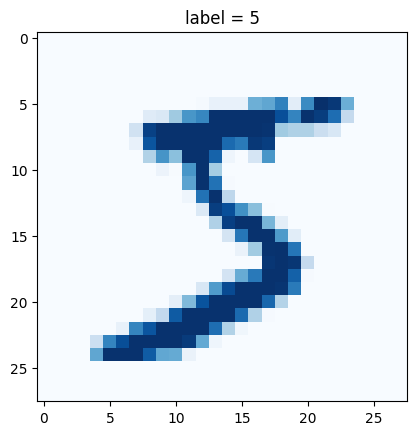

In [59]:
import matplotlib.pyplot as plt
num_example=0
plt.imshow(train_dataset[num_example][0], interpolation='none', cmap='Blues')
plt.title("label = " + str(train_dataset[num_example][1]))
plt.show()

/var/folders/nf/j0gr9tfn3gg2ln2c25rl4wnc0000gn/T/ipykernel_54030/114929139.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


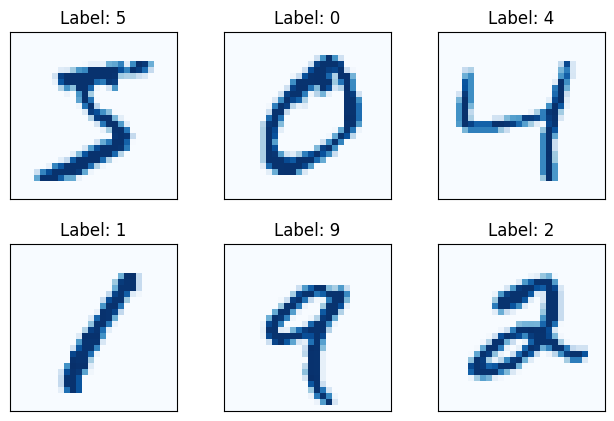

In [60]:
# and a few more
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(train_dataset[i][0], interpolation='none', cmap='Blues')
  plt.title(f"Label: {train_dataset[i][1]}")
  plt.xticks([])
  plt.yticks([])

### Task 1


*   Understand everything above!
*   Play with the plottings and find an example which you find hard to classify yourself (as an example look at the index 42 in the dataset)
*   What `dtype` is the label (i.e. integer, float, string????) -> Find out
*   What happens if you access `train_dataset[60000]` and what is with `train_dataset[-1]` ?




### Completed Tasks:

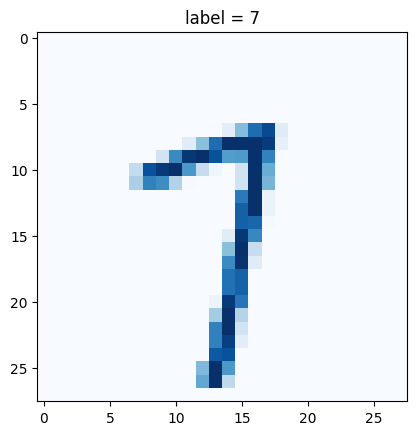

In [61]:
# plot the image at index 42 in the dataset
import matplotlib.pyplot as plt
num_example=42
plt.imshow(train_dataset[num_example][0], interpolation='none', cmap='Blues')
plt.title("label = " + str(train_dataset[num_example][1]))
plt.show()

In [62]:
# data type of label
type(train_dataset[num_example][1])

int

In [63]:
# train_dataset[60000][0]
# it gives error as the dataset has only 60000 images and the index starts at 0 and ends at 59999

In [64]:
print(train_dataset[59999]) 
# or -1 is at the same index location as 59999
print(train_dataset[-1])

(<PIL.Image.Image image mode=L size=28x28 at 0x297E957F0>, 8)
(<PIL.Image.Image image mode=L size=28x28 at 0x29D475670>, 8)


## Neural Network

Now that we have our data  available, we can feed it in a neural network. Since a neural network needs input data in a tensor format, we have to convert our PIL images to tensors. Normally, one does this directly with transforms when loading the dataset and we will do this in the next lab. However, it is not strictly necessary because we can also do this in the training loop.

Every network in PyTorch is implemented  by the **nn.Module class**. Because of that, you always define a new class which inherits from `nn.Module`. In this class definition, we have to define the properties of the network(e.g. the amount of layers) via the instance attributes(e.g. `self.layers`) and implement the `forward` method where we build the computation graph. Don't worry, let's look at an example.

In [65]:
import torch.nn as nn

### Simple 2 layer neural network with sigmoid activations

class Classifier(nn.Module): # 'Classifier' is the name our Neural Network, we are free to choose this name. It could also be 'Classifier123', for example.
                             # Inheriting von nn.Module is NOT changeable

  def __init__(self):
    # call the init of the parent PyTorch class -> we need to do this since we are inheriting from nn.Module
    super().__init__() # super() is a function that returns the parent object of the class. So here it returns nn.Module and we call its init function

    # define and set instance variables here: 'counter' and 'accumulator' for measuring progress during training
    self.counter = 0 # this is just a counter that we will use to count the steps (batches) during training
    self.losses = [] 

    # define the model -> here we sequentially chains two linear layers with Sigmoid activation functions
    # as you can see, every part is a predefined module from torch.nn
    self.model = nn.Sequential( # nn.Sequential is a container for the modules that we defined above
      nn.Linear(28*28, 200), # nn.Linear is a linear transformation (i.e. y = Wx + b) with 28*28 inputs and 200 outputs
      nn.Sigmoid(), # nn.Sigmoid is the sigmoid activation function
      nn.Linear(200, 10), # another linear transformation with 200 inputs and 10 outputs
      nn.Sigmoid() # sigmoid activation function
      )

    # define loss function
    self.loss_function = nn.CrossEntropyLoss() # nn.CrossEntropyLoss() is the cross entropy loss function

    # optimizer
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01) # torch.optim.SGD is the stochastic gradient descent optimizer

  def forward(self, inputs):
    # run input through model
    return self.model(inputs) # self.model is the nn.Sequential that we defined above

  def train(self, inputs, targets):
    """
    This function defines the training loop
    """
    ## First we want to convert the image (PIL) data to tensors
    input_tensors= torchvision.transforms.ToTensor()(inputs).flatten()
    ## from PIL to tensors -> ToTensor is a callable class that converts the inputs to Tensors. We then flatten the 2D data to be 1D
    ## since our model just accepts 1D Tensors.

    # run inputs through the neural network (forward propagation)
    outputs = self(input_tensors)
    ## How self(input_tensors) works is that it just passes the input_tensors to the forward() function defined a bit above.
    ## So the outputs will be the activations of our last layer in neural network
    ##
    ## More in depth a nn.Module class (e.g. our Classifier) is something what is called a callable. This means that you can treat the class
    ## like a function and it then exhibits the forward pass. We do it above with self(...) since we defined our training loop
    ## inside our model class.




    # calculate loss
    loss = self.loss_function(outputs, torch.tensor(targets))
    ## our loss, the CrossEntropy, requires the targets(i.e. labels) to be integers. So, we are already all fine
    ## because that is exactly how they are saved in our MNIST Dataset

    # increase counter each step and also accumulate error every 1000 steps(batches)
    self.counter += 1
    if (self.counter % 1000 == 0):
        self.losses.append(loss.item())

    if (self.counter % 10000 == 0):
        print("counter = ", self.counter)

    # Here, most of the magic happens
    # zero out old gradients -> perform a backward pass -> and update the weights with gradients calculated
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

  def plot_progress(self):
        """Plot loss over every 1000th step"""
        plt.plot(self.losses, alpha=0.5, marker='.')
        plt.title('loss every 1000 steps')

With this blueprint we now create a neural network instance and start the training

In [66]:
%%time

# create neural network
model = Classifier()

# train network on MNIST data set
epochs = 4

# (dataloaders will be introduced in the next lab, so we will not use them here.)

# training loop
for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for image, target in train_dataset:
      # actually we are here feeding in batches of size 1 -> so complete stochastic gradient descent
      model.train(image, target)

training epoch 1 of 4
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 4
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 4
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
training epoch 4 of 4
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
CPU times: user 1min 2s, sys: 10.5 s, total: 1min 12s
Wall time: 1min 4s


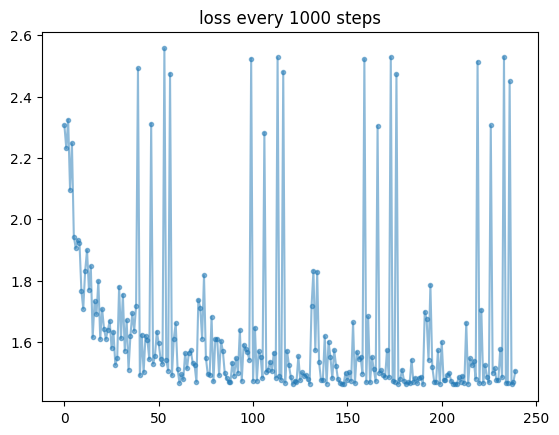

In [67]:
model.plot_progress()

### Task 2



*   Change the optimizer to Adam
*   Add layers and look at the time the training takes
*   Try to program passing batches into the train funtion without using PyTorch DataLoaders










### Tasks Completed

#### Using Adam Optimizer

In [68]:
import torch.nn as nn

### Simple 2 layer neural network with sigmoid activations

class Classifier(nn.Module): # 'Classifier' is the name our Neural Network, we are free to choose this name. It could also be 'Classifier123', for example.
                             # Inheriting von nn.Module is NOT changeable

  def __init__(self):
    # call the init of the parent PyTorch class -> we need to do this since we are inheriting from nn.Module
    super().__init__() # super() is a function that returns the parent object of the class. So here it returns nn.Module and we call its init function

    # define and set instance variables here: 'counter' and 'accumulator' for measuring progress during training
    self.counter = 0 # this is just a counter that we will use to count the steps (batches) during training
    self.losses = [] 

    # define the model -> here we sequentially chains two linear layers with Sigmoid activation functions
    # as you can see, every part is a predefined module from torch.nn
    self.model = nn.Sequential( # nn.Sequential is a container for the modules that we defined above
      nn.Linear(28*28, 200), # nn.Linear is a linear transformation (i.e. y = Wx + b) with 28*28 inputs and 200 outputs
      nn.Sigmoid(), # nn.Sigmoid is the sigmoid activation function
      nn.Linear(200, 10), # another linear transformation with 200 inputs and 10 outputs
      nn.Sigmoid() # sigmoid activation function
      )

    # define loss function
    self.loss_function = nn.CrossEntropyLoss() # nn.CrossEntropyLoss() is the cross entropy loss function

    # optimizer adam
    self.optimiser = torch.optim.Adam(self.parameters(), lr=0.01) # torch.optim.Adam is the Adam optimizer

  def forward(self, inputs):
    # run input through model
    return self.model(inputs) # self.model is the nn.Sequential that we defined above

  def train(self, inputs, targets):
    """
    This function defines the training loop
    """
    ## First we want to convert the image (PIL) data to tensors
    input_tensors= torchvision.transforms.ToTensor()(inputs).flatten()
    ## from PIL to tensors -> ToTensor is a callable class that converts the inputs to Tensors. We then flatten the 2D data to be 1D
    ## since our model just accepts 1D Tensors.

    # run inputs through the neural network (forward propagation)
    outputs = self(input_tensors)
    ## How self(input_tensors) works is that it just passes the input_tensors to the forward() function defined a bit above.
    ## So the outputs will be the activations of our last layer in neural network
    ##
    ## More in depth a nn.Module class (e.g. our Classifier) is something what is called a callable. This means that you can treat the class
    ## like a function and it then exhibits the forward pass. We do it above with self(...) since we defined our training loop
    ## inside our model class.




    # calculate loss
    loss = self.loss_function(outputs, torch.tensor(targets))
    ## our loss, the CrossEntropy, requires the targets(i.e. labels) to be integers. So, we are already all fine
    ## because that is exactly how they are saved in our MNIST Dataset

    # increase counter each step and also accumulate error every 1000 steps(batches)
    self.counter += 1
    if (self.counter % 1000 == 0):
        self.losses.append(loss.item())

    if (self.counter % 10000 == 0):
        print("counter = ", self.counter)

    # Here, most of the magic happens
    # zero out old gradients -> perform a backward pass -> and update the weights with gradients calculated
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

  def plot_progress(self):
        """Plot loss over every 1000th step"""
        plt.plot(self.losses, alpha=0.5, marker='.')
        plt.title('loss every 1000 steps')

In [69]:
%%time
# create neural network
model_1 = Classifier()

# train network on MNIST data set
epochs = 4

# (dataloaders will be introduced in the next lab, so we will not use them here.)

# training loop
for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for image, target in train_dataset:
      # actually we are here feeding in batches of size 1 -> so complete stochastic gradient descent
      model.train(image, target)

training epoch 1 of 4
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
training epoch 2 of 4
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
training epoch 3 of 4
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
training epoch 4 of 4
counter =  430000
counter =  440000
counter =  450000
counter =  460000
counter =  470000
counter =  480000
CPU times: user 1min 7s, sys: 11 s, total: 1min 18s
Wall time: 1min 10s


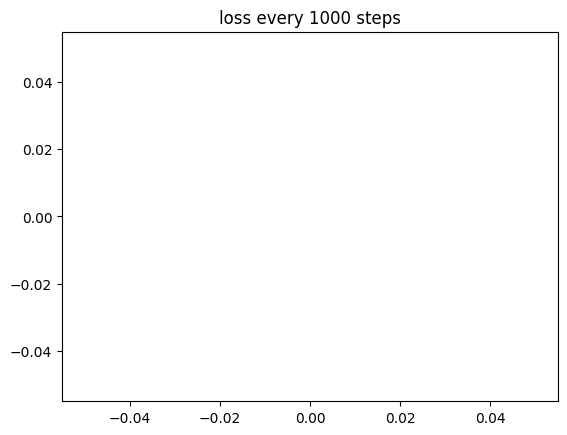

In [70]:
model_1.plot_progress()

# Observations:
1. With adam optimizer the time increased from `1m,20s` to `3m,15s`
2. Swif change in the model performance in the begining.

#### Adding Layers in the model

In [71]:
import torch.nn as nn

### Simple 2 layer neural network with sigmoid activations

class Classifier(nn.Module): # 'Classifier' is the name our Neural Network, we are free to choose this name. It could also be 'Classifier123', for example.
                             # Inheriting von nn.Module is NOT changeable

  def __init__(self):
    # call the init of the parent PyTorch class -> we need to do this since we are inheriting from nn.Module
    super().__init__() # super() is a function that returns the parent object of the class. So here it returns nn.Module and we call its init function

    # define and set instance variables here: 'counter' and 'accumulator' for measuring progress during training
    self.counter = 0 # this is just a counter that we will use to count the steps (batches) during training
    self.losses = [] 

    # define the model -> here we sequentially chains two linear layers with Sigmoid activation functions
    # as you can see, every part is a predefined module from torch.nn
    self.model = nn.Sequential( # nn.Sequential is a container for the modules that we defined above
      nn.Linear(28*28, 200), # nn.Linear is a linear transformation (i.e. y = Wx + b) with 28*28 inputs and 200 outputs
      nn.Sigmoid(), # nn.Sigmoid is the sigmoid activation function
      nn.Linear(200, 10), # another linear transformation with 200 inputs and 10 outputs
      nn.Sigmoid(), # sigmoid activation function
      nn.Linear(10, 10),
      nn.Sigmoid()
      )

    # define loss function
    self.loss_function = nn.CrossEntropyLoss() # nn.CrossEntropyLoss() is the cross entropy loss function

    # optimizer adam
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01) 

  def forward(self, inputs):
    # run input through model
    return self.model(inputs) # self.model is the nn.Sequential that we defined above

  def train(self, inputs, targets):
    """
    This function defines the training loop
    """
    ## First we want to convert the image (PIL) data to tensors
    input_tensors= torchvision.transforms.ToTensor()(inputs).flatten()
    ## from PIL to tensors -> ToTensor is a callable class that converts the inputs to Tensors. We then flatten the 2D data to be 1D
    ## since our model just accepts 1D Tensors.

    # run inputs through the neural network (forward propagation)
    outputs = self(input_tensors)
    ## How self(input_tensors) works is that it just passes the input_tensors to the forward() function defined a bit above.
    ## So the outputs will be the activations of our last layer in neural network
    ##
    ## More in depth a nn.Module class (e.g. our Classifier) is something what is called a callable. This means that you can treat the class
    ## like a function and it then exhibits the forward pass. We do it above with self(...) since we defined our training loop
    ## inside our model class.




    # calculate loss
    loss = self.loss_function(outputs, torch.tensor(targets))
    ## our loss, the CrossEntropy, requires the targets(i.e. labels) to be integers. So, we are already all fine
    ## because that is exactly how they are saved in our MNIST Dataset

    # increase counter each step and also accumulate error every 1000 steps(batches)
    self.counter += 1
    if (self.counter % 1000 == 0):
        self.losses.append(loss.item())

    if (self.counter % 10000 == 0):
        print("counter = ", self.counter)

    # Here, most of the magic happens
    # zero out old gradients -> perform a backward pass -> and update the weights with gradients calculated
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

  def plot_progress(self):
        """Plot loss over every 1000th step"""
        plt.plot(self.losses, alpha=0.5, marker='.')
        plt.title('loss every 1000 steps')

In [72]:
%%time
# create neural network
model_2 = Classifier()

# train network on MNIST data set
epochs = 4

# (dataloaders will be introduced in the next lab, so we will not use them here.)

# training loop
for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for image, target in train_dataset:
      # actually we are here feeding in batches of size 1 -> so complete stochastic gradient descent
      model.train(image, target)

training epoch 1 of 4
counter =  490000
counter =  500000
counter =  510000
counter =  520000
counter =  530000
counter =  540000
training epoch 2 of 4
counter =  550000
counter =  560000
counter =  570000
counter =  580000
counter =  590000
counter =  600000
training epoch 3 of 4
counter =  610000
counter =  620000
counter =  630000
counter =  640000
counter =  650000
counter =  660000
training epoch 4 of 4
counter =  670000
counter =  680000
counter =  690000
counter =  700000
counter =  710000
counter =  720000
CPU times: user 1min 5s, sys: 11.3 s, total: 1min 16s
Wall time: 1min 8s


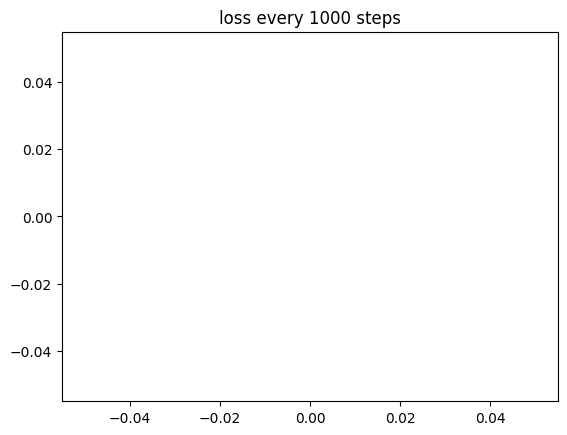

In [74]:
model_2.plot_progress()

## Test time 😃

Now, let us evaluate how good our model performs. Therefore, we load the test set of MNIST. Remember, and that should be absolutely clear to you(!), the test set should be used only very sparsely to evaluate the trained model to get a real measure of performance. Never use the test examples also for training, otherwise your evaluation will be hugely biased! There are even more intricacies to the test set which you will witness in the next course sessions.

In [75]:
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True)

In [76]:
len(test_dataset)

10000

In [82]:
# test trained neural network on test data

# Here we just pass each test example through the model and set the class which get the highest score to be the predicted class.
# We then compare the prediction to the truth for each example
score = 0
items = 0

for image, label in test_dataset:
    image_as_flattened_tensor = torchvision.transforms.ToTensor()(image).flatten()
    predictions = model(image_as_flattened_tensor)
    # We need to transform the predictions from a tensor into a numpy array so that we can easily work with them
    predictions_as_numpy_array = predictions.detach().numpy()
    predicted_label = predictions_as_numpy_array.argmax()
    if (predicted_label == label):
        score += 1

    items += 1

print(f'Correct {score} from {items} test examples, accuracy: {score/items*100:.2f}%')

Correct 9388 from 10000 test examples, accuracy: 93.88%


#### Model_1 with Adam Optimizer

In [83]:
# test trained neural network on test data

# Here we just pass each test example through the model and set the class which get the highest score to be the predicted class.
# We then compare the prediction to the truth for each example
score = 0
items = 0

for image, label in test_dataset:
    image_as_flattened_tensor = torchvision.transforms.ToTensor()(image).flatten()
    predictions = model_1(image_as_flattened_tensor)
    # We need to transform the predictions from a tensor into a numpy array so that we can easily work with them
    predictions_as_numpy_array = predictions.detach().numpy()
    predicted_label = predictions_as_numpy_array.argmax()
    if (predicted_label == label):
        score += 1

    items += 1

print(f'Correct {score} from {items} test examples, accuracy: {score/items*100:.2f}%')

Correct 1028 from 10000 test examples, accuracy: 10.28%


#### Model_2 with another layer

In [84]:
# test trained neural network on test data

# Here we just pass each test example through the model and set the class which get the highest score to be the predicted class.
# We then compare the prediction to the truth for each example
score = 0
items = 0

for image, label in test_dataset:
    image_as_flattened_tensor = torchvision.transforms.ToTensor()(image).flatten()
    predictions = model_2(image_as_flattened_tensor)
    # We need to transform the predictions from a tensor into a numpy array so that we can easily work with them
    predictions_as_numpy_array = predictions.detach().numpy()
    predicted_label = predictions_as_numpy_array.argmax()
    if (predicted_label == label):
        score += 1

    items += 1

print(f'Correct {score} from {items} test examples, accuracy: {score/items*100:.2f}%')

Correct 859 from 10000 test examples, accuracy: 8.59%


The accuracy is about 91.6%. from original Model. Is that good or bad?

Let's look at one example to enhance our intuition about the training results.

Test example 43


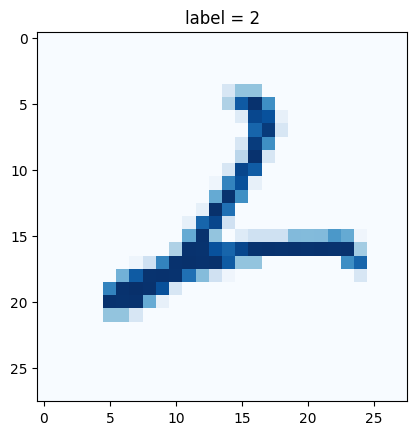


output_values =
 [1.40075133e-06 1.54809495e-02 9.96241331e-01 1.02404185e-04
 1.88110149e-04 2.52034632e-03 5.02583571e-04 8.05131695e-09
 2.04988779e-03 1.98498029e-07]

Sum of the output values =  1.0170872211456299


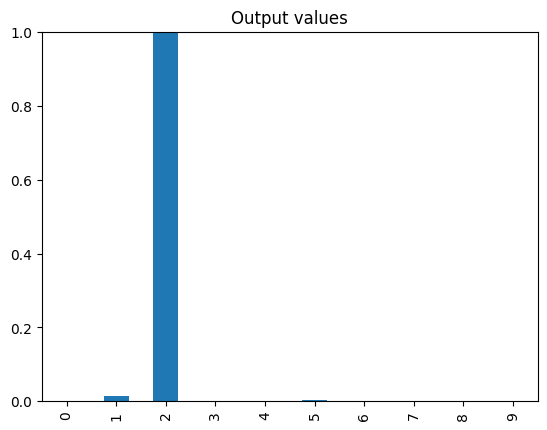

In [85]:
test_example= 43
print(f"Test example {test_example}")
test_image = test_dataset[test_example][0]
test_label = test_dataset[test_example][1]

plt.imshow(test_image, interpolation='none', cmap='Blues')
plt.title("label = " + str(test_label))
plt.show()


# query from trained network
test_image_as_flattened_tensor = torchvision.transforms.ToTensor()(test_image).flatten()
predictions = model(test_image_as_flattened_tensor)
predictions_as_numpy_array = predictions.detach().numpy()
print("")
print("output_values =\n",predictions_as_numpy_array)
print("")
print("Sum of the output values = ",predictions.sum().item())
# plot output tensor
pd.DataFrame(predictions_as_numpy_array).plot(kind='bar', legend=False, ylim=(0,1), title='Output values');

As you can see, the results do not add up to one. This is not desirable because we want the results to be in the form of probabilities, expressing how certain the model is that the image belongs to a specific label. Because we need that the sum over all labels adds up to 1 (or 100%). Let see how we can do that

 Deep Dive: More specifically, we want the results to be in the **form** of a probability mass function. As such, the probabilities of all labels must sum to one and each be greater than/equal to zero according the probability axioms


output_values =
 [0.08525849 0.08658851 0.2308868  0.0852671  0.08527441 0.08547352
 0.08530123 0.08525836 0.08543331 0.08525838]

Sum of the output values =  1.0000001192092896


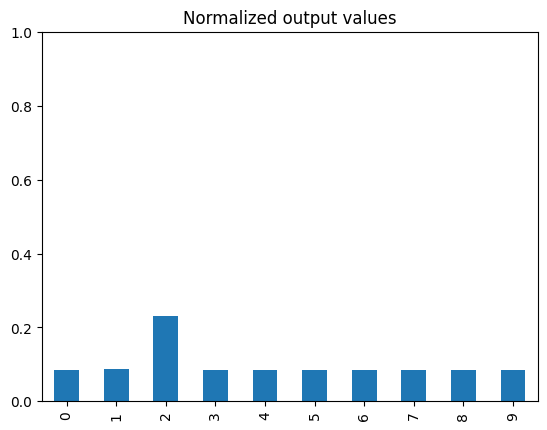

In [86]:
#Let's convert our output to probabilities (at least kind of -> these are of course fake probabilities because we artifically make them but they help for human interpretability)
predictions_as_probabilities = torch.nn.functional.softmax(predictions, dim = 0)
predictions_as_probabilities_np = predictions_as_probabilities.detach().numpy()
# plot output tensor
pd.DataFrame(predictions_as_probabilities_np).plot(kind='bar', legend=False, ylim=(0,1), title='Normalized output values')
print("")
print("output_values =\n",predictions_as_probabilities_np)
print("")
print("Sum of the output values = ",predictions_as_probabilities.sum().item())

### Task 3



* Build some code to compute the accuracy for the training dataset and compare it with the accuracy for the test dataset calculated above




In [87]:
# compute the accuracy for training data and compare it with the test accuracy
score = 0
items = 0

for image, label in train_dataset:
    image_as_flattened_tensor = torchvision.transforms.ToTensor()(image).flatten()
    predictions = model(image_as_flattened_tensor)
    # We need to transform the predictions from a tensor into a numpy array so that we can easily work with them
    predictions_as_numpy_array = predictions.detach().numpy()
    predicted_label = predictions_as_numpy_array.argmax()
    if (predicted_label == label):
        score += 1

    items += 1

print(f'Correct {score} from {items} train examples, accuracy: {score/items*100:.2f}%')

# compute the accuracy for training data and compare it with the test accuracy
score = 0
items = 0

for image, label in test_dataset:
    image_as_flattened_tensor = torchvision.transforms.ToTensor()(image).flatten()
    predictions = model(image_as_flattened_tensor)
    # We need to transform the predictions from a tensor into a numpy array so that we can easily work with them
    predictions_as_numpy_array = predictions.detach().numpy()
    predicted_label = predictions_as_numpy_array.argmax()
    if (predicted_label == label):
        score += 1

    items += 1

print(f'Correct {score} from {items} train examples, accuracy: {score/items*100:.2f}%')

Correct 56304 from 60000 train examples, accuracy: 93.84%


In [88]:
# compute the accuracy for training data and compare it with the test accuracy
score = 0
items = 0

for image, label in test_dataset:
    image_as_flattened_tensor = torchvision.transforms.ToTensor()(image).flatten()
    predictions = model(image_as_flattened_tensor)
    # We need to transform the predictions from a tensor into a numpy array so that we can easily work with them
    predictions_as_numpy_array = predictions.detach().numpy()
    predicted_label = predictions_as_numpy_array.argmax()
    if (predicted_label == label):
        score += 1

    items += 1

print(f'Correct {score} from {items} train examples, accuracy: {score/items*100:.2f}%')

Correct 9388 from 10000 train examples, accuracy: 93.88%


Epoch 1: Train Accuracy: 100.00, Test Accuracy: 100.00
Epoch 2: Train Accuracy: 100.00, Test Accuracy: 100.00
Epoch 3: Train Accuracy: 100.00, Test Accuracy: 100.00
Epoch 4: Train Accuracy: 100.00, Test Accuracy: 100.00
Epoch 5: Train Accuracy: 100.00, Test Accuracy: 100.00
Epoch 6: Train Accuracy: 100.00, Test Accuracy: 100.00
Epoch 7: Train Accuracy: 100.00, Test Accuracy: 100.00
Epoch 8: Train Accuracy: 100.00, Test Accuracy: 100.00
Epoch 9: Train Accuracy: 100.00, Test Accuracy: 100.00
Epoch 10: Train Accuracy: 100.00, Test Accuracy: 100.00


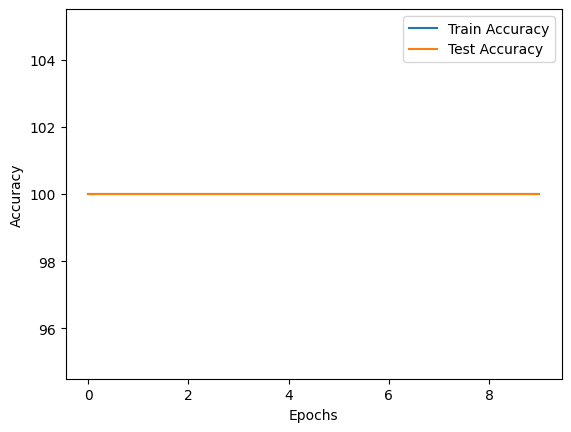

In [90]:
import matplotlib.pyplot as plt

num_epochs = 10

train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):

    # Compute training accuracy
    train_score = 0
    train_items = 0

    for image, label in train_dataset:
        image_as_flattened_tensor = torchvision.transforms.ToTensor()(image).flatten()
        predictions = model(image_as_flattened_tensor)
        # We need to transform the predictions from a tensor into a numpy array so that we can easily work with them
        predictions_as_numpy_array = predictions.detach().numpy()
        predicted_label = predictions_as_numpy_array.argmax()
        if (predicted_label == label):
            score += 1

        train_score += 1
        train_items += 1
        
    train_accuracy = train_score/train_items * 100
    train_accuracies.append(train_accuracy)

    # Compute test accuracy
    test_score = 0
    test_items = 0  

    for image, label in test_dataset:
        image_as_flattened_tensor = torchvision.transforms.ToTensor()(image).flatten()
        predictions = model(image_as_flattened_tensor)
        # We need to transform the predictions from a tensor into a numpy array so that we can easily work with them
        predictions_as_numpy_array = predictions.detach().numpy()
        predicted_label = predictions_as_numpy_array.argmax()
        if (predicted_label == label):
            score += 1

        test_score += 1
        test_items += 1

    test_accuracy = test_score/test_items * 100      
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch+1}: Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')
    
# Plot the accuracy over epochs
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

😈😈😈**Break the System**😈😈😈

Come up with minor changes to the input the data(the images) that won't affect humans but break the system(i.e. yield much lower accuracy). For example, you could try what happens when you invert the images or change the gray colors. Be creative! :)
